# Persiapan

In [ ]:
# Impor library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hubungkan ke googledrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Dibimbing/Assignment Extra Class 8 - Churn Anylisis/Churn_Modelling.csv'
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama untuk memastikan data berhasil dimuat
print("Dataset berhasil dimuat!")
df.head()

Dataset berhasil dimuat!


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Eksplorasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Cek missing value
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

# Menghitung jumlah data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())

Jumlah missing values per kolom:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Jumlah data duplikat: 0


# Visualisasi Data

Seberapa banyak pelanggan yang churn vs. yang tidak?

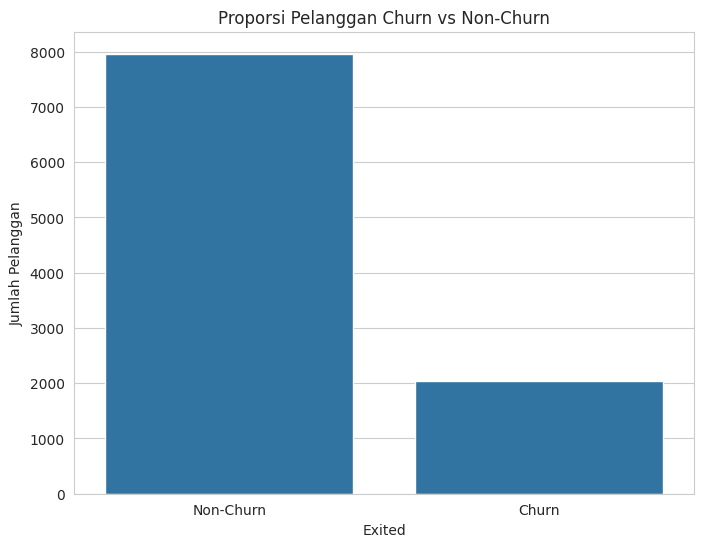

Persentase Churn: 20.37%
Persentase Non-Churn: 79.63%


In [ ]:
# style visualisasi
sns.set_style('whitegrid')

# Visualisasi proporsi pelanggan yang 'Exited' (churn)
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df)
plt.title('Proporsi Pelanggan Churn vs Non-Churn')
plt.xticks([0, 1], ['Non-Churn', 'Churn'])
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Tampilkan dalam bentuk persentase
churn_percentage = df['Exited'].value_counts(normalize=True) * 100
print(f"Persentase Churn: {churn_percentage[1]:.2f}%")
print(f"Persentase Non-Churn: {churn_percentage[0]:.2f}%")

perbandingan 80/20, data ini dianggap tidak seimbang (imbalanced).

Apakah churn berbeda berdasarkan Geography, Gender, dll?

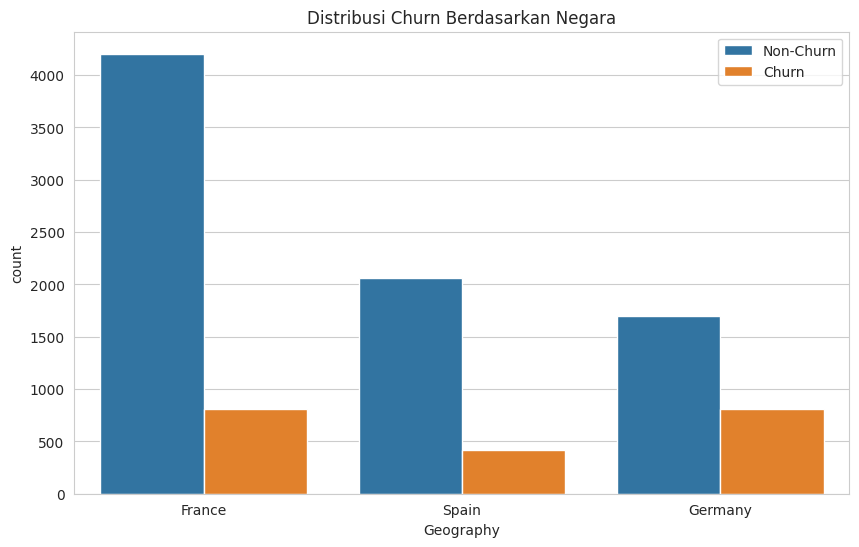

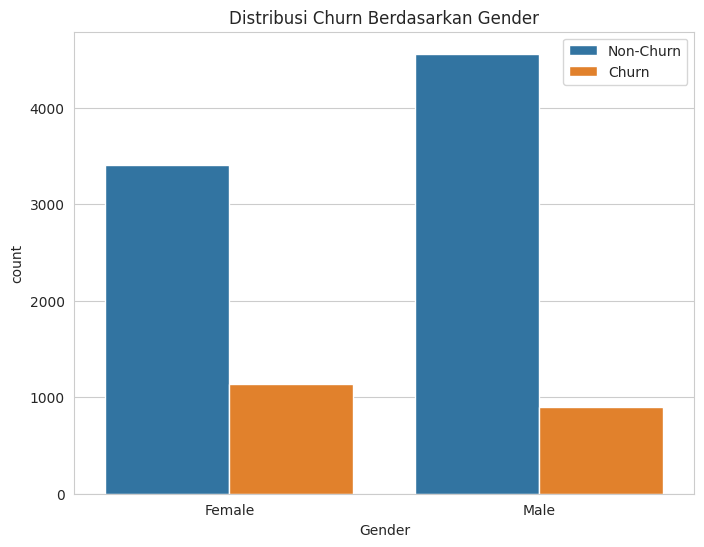

In [ ]:
# Churn berdasarkan Geografi
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Distribusi Churn Berdasarkan Negara')
plt.legend(['Non-Churn', 'Churn'])
plt.show()

# Churn berdasarkan Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Distribusi Churn Berdasarkan Gender')
plt.legend(['Non-Churn', 'Churn'])
plt.show()

Insight:
* Secara jumlah total, Prancis (France) adalah negara dengan nasabah terbanyak, diikuti Jerman (Germany) dan Spanyol (Spain).
* Jerman: Nah, ini dia yang paling menarik! Meskipun jumlah nasabahnya lebih sedikit dari Prancis, bar oranye (Churn) di Jerman hampir setinggi di Prancis. Ini artinya, secara persentase, tingkat churn nasabah di Jerman jauh lebih tinggi dibandingkan dua negara lainnya.

Kalau berdasarkan Genre, cewe lebih banyak churn. Kenapa ya?

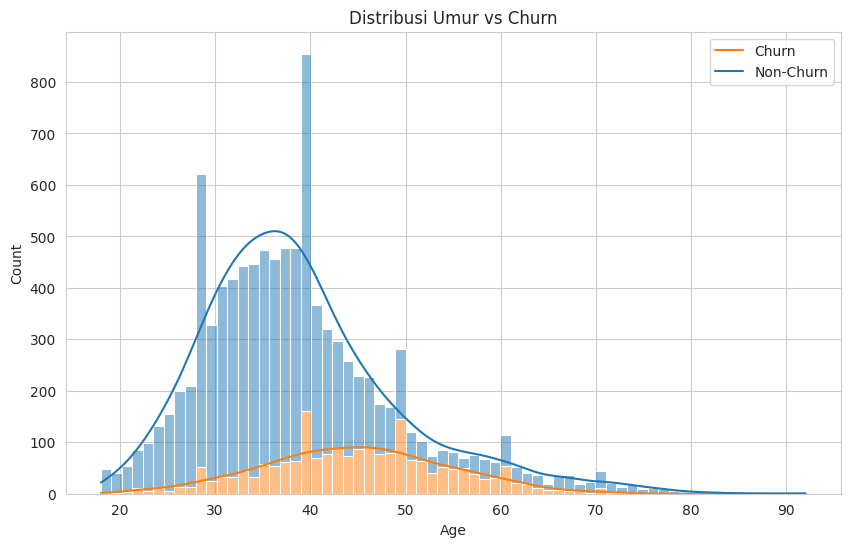

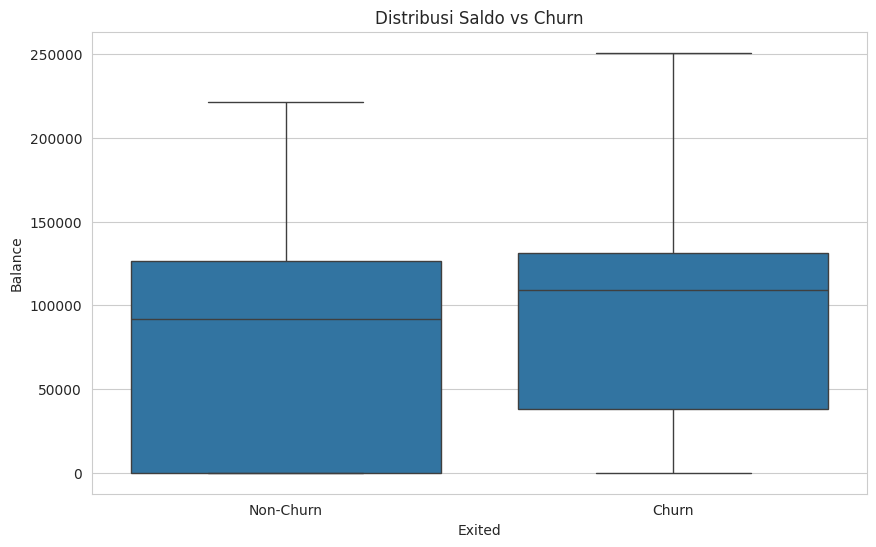

In [ ]:
# Distribusi Umur untuk pelanggan Churn vs Non-Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', kde=True)
plt.title('Distribusi Umur vs Churn')
plt.legend(['Churn', 'Non-Churn'])
plt.show()

# Distribusi Saldo untuk pelanggan Churn vs Non-Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Distribusi Saldo vs Churn')
plt.xticks([0, 1], ['Non-Churn', 'Churn'])
plt.show()

Dari Histogram
* Distribusi nasabah yang Non-Churn (biru) puncaknya ada di rentang usia 30-40 tahun. Ini adalah basis nasabah loyalmu.
* Distribusi nasabah yang Churn (oranye) terlihat lebih landai dan puncaknya bergeser ke kanan, yaitu di rentang usia 40-55 tahun. Ada juga lonjakan kecil churn pada nasabah yang lebih tua (di atas 65 tahun).

Insight: Bank ini tampaknya sangat baik dalam mengakuisisi dan melayani nasabah di usia produktif awal (30-an), namun gagal mempertahankan mereka saat memasuki fase kehidupan yang lebih mapan (40-an dan 50-an). **Trus kenapa ya nasabah di rentang usia 40-55 tahun pergi?** Apakah karna kompetitor lain lebih bisa menyediakan layanan atau produk yang lebih baik untuk segmen ini?

**Distribusi Saldo vs Churn**
Apa yang kita lihat?
Di grup Non-Churn, banyak banget nasabah yang saldonya nol. Makanya boxplotnya lebar dan mulai dari 0.
Di grup Churn, saldo mereka cenderung lebih tinggi. Median saldo di sini jauh lebih gede, dan hampir nggak ada nasabah churn yang saldonya nol.

Insightnya?

Nasabah saldo nol malah lebih setia (mereka nggak churn).

Yang cabut justru mereka yang punya saldo, alias nasabah aktif dan bernilai.

Kenapa bisa begitu?

Nasabah saldo nol kayaknya cuma “diam di rekening”, nggak kepikiran mau nutup karena nggak kena biaya admin atau emang udah lama nggak aktif.

Sementara nasabah yang punya saldo dan malah pergi itu sinyal serius. Mereka cukup aktif dan pasti punya alasan buat pindahin uangnya ke bank lain.

👉 Intinya, bank harus fokus nge-keep nasabah yang saldo-nya gede biar mereka nggak kabur!

# Pemrosesan Data

In [ ]:
df_processed = df.copy()

# Menghapus kolom yang tidak relevan
# RowNumber, CustomerId, dan Surname adalah pengenal unik dan tidak mempengaruhi churn
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_processed = df_processed.drop(columns=columns_to_drop)

print("Berhasil menghapus kolom yang tidak relevan.")
print(f"Kolom yang dihapus: {columns_to_drop}")

Berhasil menghapus kolom yang tidak relevan.
Kolom yang dihapus: ['RowNumber', 'CustomerId', 'Surname']


In [ ]:
# One-Hot Encoding kategorical untuk kolom 'Geography' dan 'Gender'
df_model = pd.get_dummies(df_processed, columns=['Geography', 'Gender'], drop_first=True)

print("\nBerhasil melakukan One-Hot Encoding pada kolom kategori.")


# --- Verifikasi Hasil ---
print("\nDataFrame setelah diproses (df_model):")
display(df_model.head())

# Cek info untuk memastikan semua kolom sudah dalam format numerik
print("\nInfo dari DataFrame baru:")
df_model.info()


Berhasil melakukan One-Hot Encoding pada kolom kategori.

DataFrame setelah diproses (df_model):


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False



Info dari DataFrame baru:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


# Permodelan

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Memisahkan/Splitting fitu (X) dan Target (y)
X = df_model.drop(columns='Exited')
y = df_model['Exited']

print("Data fitur (X) dan target (y) berhasil dipisahkan.")

Data fitur (X) dan target (y) berhasil dipisahkan.


In [ ]:
# Bagi data menjadi Train Data (80%) dan Test Data (20%)
# test_size=0.2 berarti 20% datanya buat testing
# random_state=42 biar pembagian datanya selalu konsisten setiap kali di-run
# stratify=y biar proporsi churn di data train dan test tetap sama kayak di data asli
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data berhasil dibagi: {len(X_train)} baris untuk latih dan {len(X_test)} baris untuk uji.")

Data berhasil dibagi: 8000 baris untuk latih dan 2000 baris untuk uji.


In [ ]:
# Feature Scaling
# pake StandardScaler biar skalanya lebih rapi
scaler = StandardScaler()

# belajar scale dari data train, lalu langsung transform datanya
X_train_scaled = scaler.fit_transform(X_train)
# untuk data test cukup di-transform aja biar gak ada data leak
X_test_scaled = scaler.transform(X_test)

print("Feature scaling berhasil dilakukan.")

Feature scaling berhasil dilakukan.


In [ ]:
# Latih Model Machine Learning
# Melatih 2 model untuk perbandingan

# Model 1: Logistic Regression (Baseline Model)
print("\nMelatih Model Logistic Regression...")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
print("Model Logistic Regression selesai dilatih!")

# Model 2: Random Forest Classifier (Model yang lebih kompleks)
print("\nMelatih Model Random Forest...")
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train_scaled, y_train)
print("Model Random Forest selesai dilatih!")


Melatih Model Logistic Regression...
Model Logistic Regression selesai dilatih!

Melatih Model Random Forest...
Model Random Forest selesai dilatih!


# Evaluasi dan Interpretasi

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat Prediksi pada Data Uji
# Menggunakan model yang sudah terlatih ('log_reg' dan 'rand_forest')
# untuk memprediksi target pada data uji ('X_test_scaled')
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_rf = rand_forest.predict(X_test_scaled)

print("Prediksi pada data uji berhasil dibuat")

Prediksi pada data uji berhasil dibuat


In [ ]:
# Evaluasi Perfoma Model
# disini akan bandingkan hasil prediksi (y_pred) dengan hasil sebenarnya (y_test)

print("\n--- Hasil Evaluasi Model Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Non-Churn (0)', 'Churn (1)']))

print("\n--- Hasil Evaluasi Model Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Churn (0)', 'Churn (1)']))


--- Hasil Evaluasi Model Logistic Regression ---
Accuracy: 0.8080
Classification Report:
               precision    recall  f1-score   support

Non-Churn (0)       0.82      0.97      0.89      1593
    Churn (1)       0.59      0.19      0.28       407

     accuracy                           0.81      2000
    macro avg       0.71      0.58      0.59      2000
 weighted avg       0.78      0.81      0.77      2000


--- Hasil Evaluasi Model Random Forest ---
Accuracy: 0.8640
Classification Report:
               precision    recall  f1-score   support

Non-Churn (0)       0.88      0.97      0.92      1593
    Churn (1)       0.78      0.46      0.58       407

     accuracy                           0.86      2000
    macro avg       0.83      0.71      0.75      2000
 weighted avg       0.86      0.86      0.85      2000



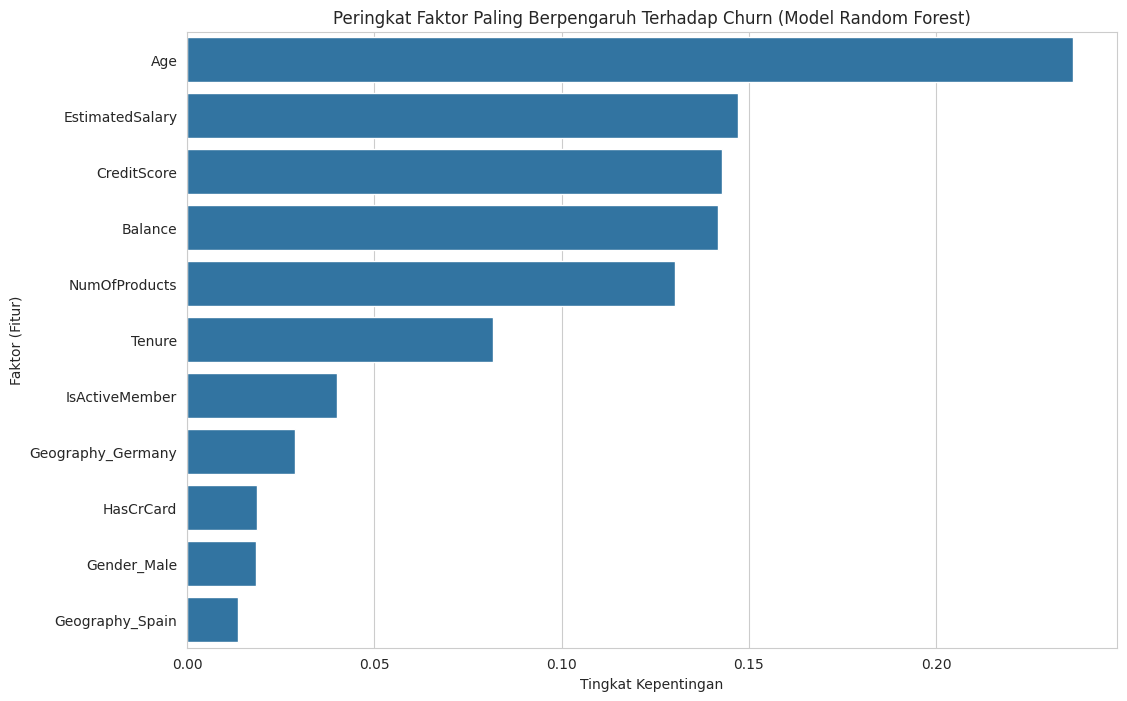


Faktor-faktor yang paling berpengaruh menurut model:
              Feature  Importance
1                 Age    0.236485
7     EstimatedSalary    0.147016
0         CreditScore    0.142756
3             Balance    0.141756
4       NumOfProducts    0.130410
2              Tenure    0.081817
6      IsActiveMember    0.039933
8   Geography_Germany    0.028923
5           HasCrCard    0.018799
10        Gender_Male    0.018483
9     Geography_Spain    0.013622


In [ ]:
# Interpretasi Model: Mencari Faktor Paling Penting (dari Random Forest)
# Random Forest memiliki 'feature_importances_' yang sangat berguna
# untuk melihat faktor mana yang paling berpengaruh

# Dapatkan nama fitur dan tingkat kepentingannya
importances = rand_forest.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Urutkan dari yang paling penting
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi hasil
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Peringkat Faktor Paling Berpengaruh Terhadap Churn (Model Random Forest)')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Faktor (Fitur)')
plt.show()

print("\nFaktor-faktor yang paling berpengaruh menurut model:")
print(feature_importance_df)

# Laporan

## Ringkasan Laporan:

## Latar Belakangnya
Tingkat churn pelanggan di bank kita mencapai angka yang mengkhawatirkan (~20%), yang secara langsung berisiko mengurangi basis pendapatan dan melemahkan posisi kita di pasar. Untuk mengatasi ini, sebuah analisis data mendalam telah dilakukan.

## Analisis dan Model Prediktif:
Melalui analisis data historis, kami berhasil membangun sebuah model prediksi (Random Forest) yang mampu mengidentifikasi pelanggan berisiko churn. Keberhasilan utama model ini terletak pada kemampuannya untuk mendeteksi 46% dari seluruh pelanggan yang sebenarnya akan churn (Recall: 0.46), menjadikannya alat yang efektif untuk deteksi dini dan intervensi.

## Temuan Utama:
Analisis menunjukkan bahwa profil pelanggan berisiko tinggi dapat diidentifikasi dengan jelas. Faktor-faktor pendorong churn yang paling signifikan adalah:
* Demografi & Siklus Hidup: Usia nasabah, terutama pada rentang 40-55 tahun.
* Status Finansial & Produk: Saldo rekening, jumlah produk yang dimiliki, dan estimasi gaji.
* Tingkat Keaktifan: Nasabah yang tidak aktif bertransaksi menunjukkan risiko churn yang lebih tinggi.
* Geografis: Nasabah di Jerman secara konsisten menunjukkan tingkat churn yang lebih tinggi.

## Rekomendasi Strategis:
* Mengimplementasikan Kampanye Retensi yang Dipersonalisasi: Menargetkan segmen pelanggan berisiko tinggi (usia 40-55, saldo signifikan, tidak aktif) dengan penawaran produk yang relevan dengan fase hidup mereka (misalnya, investasi, dana pensiun).
* Melakukan Investigasi Mendalam pada Pasar Jerman: Menganalisis faktor kompetisi, kesesuaian produk, dan layanan pelanggan secara spesifik untuk pasar Jerman guna memahami akar masalah tingginya churn di wilayah tersebut.


# Improvement

Mencoba Hyperparameter Tuning, coba model lain(XGBoost), dan coba Teknik Sampling(SMOTE)

## HYPERPARAMETER TUNING

In [ ]:
# HYPERPARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV

print("Memulai proses Hyperparameter Tuning untuk Random Forest...")

# Menentukan "menu" parameter yang akan dicoba
# dibawah ini beberapa parameter yang penting untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500], # Jumlah pohon dalam hutan
    'max_features': ['sqrt', 'log2'],          # Jumlah fitur yang dipertimbangkan di setiap split
    'max_depth': [10, 20, 30, 40, 50, None],   # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],           # Jumlah minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4]              # Jumlah minimum sampel di setiap daun
}

# Inisialisasi RandomizedSearchCV
# n_iter: Berapa banyak kombinasi acak yang mau dicoba
# cv: Cross-validation (disini pakai 5)
# verbose=2: Menampilkan progres
# n_jobs=-1: Menggunakan semua core CPU agar lebih cepat
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=100, # Coba 100 kombinasi
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='recall' # optimalkan untuk metrik RECALL!
)

# Latih model dengan data latih yang sudah di-scaling
rf_random_search.fit(X_train_scaled, y_train)

# Tampilkan parameter terbaik yang ditemukan
print("\nParameter terbaik yang ditemukan:")
print(rf_random_search.best_params_)

# Gunakan model terbaik untuk evaluasi
best_rf_model = rf_random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Tampilkan Classification Report dari model terbaik
print("\n--- Hasil Evaluasi Model Random Forest (Setelah Tuning) ---")
print(classification_report(y_test, y_pred_best_rf, target_names=['Non-Churn (0)', 'Churn (1)']))


Memulai proses Hyperparameter Tuning untuk Random Forest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Parameter terbaik yang ditemukan:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}

--- Hasil Evaluasi Model Random Forest (Setelah Tuning) ---
               precision    recall  f1-score   support

Non-Churn (0)       0.88      0.97      0.92      1593
    Churn (1)       0.79      0.47      0.59       407

     accuracy                           0.87      2000
    macro avg       0.84      0.72      0.75      2000
 weighted avg       0.86      0.87      0.85      2000



Recall Sebelumnya: **0.46**

Recall Setelah Tuning: **0.47**

Apakah ada algoritma lain yang secara fundamental bisa lebih baik dari Random Forest untuk kasus ini? Oke mungkin kita coba untuk pakai XGBoost akan sepert apa nanti

## MENCOBA XGBOOST

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

print("\nMemulai proses pelatihan dengan model XGBoost...")

# Inisialisasi model XGBoost
# Beberapa parameter dasar yang digunakan
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # Tipe masalah: klasifikasi biner
    eval_metric='logloss',       # Metrik untuk evaluasi internal
    use_label_encoder=False,     # Rekomendasi untuk versi baru XGBoost
    n_estimators=100,            # Jumlah pohon
    learning_rate=0.1,           # Seberapa cepat model belajar dari kesalahan
    max_depth=5,                 # Kedalaman maksimum pohon
    random_state=42
)

# Latih model dengan train data yang sama
xgb_model.fit(X_train_scaled, y_train)

print('Model XGBoost selesai dilatih')

# Buat prediksi pada data uji
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Tampilkan Classification Report dari model XGBoost
print("\n--- Hasil Evaluasi Model XGBoost ---")
print(classification_report(y_test, y_pred_xgb, target_names=['Non-Churn (0)', 'Churn (1)']))


Memulai proses pelatihan dengan model XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:09:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model XGBoost selesai dilatih

--- Hasil Evaluasi Model XGBoost ---
               precision    recall  f1-score   support

Non-Churn (0)       0.88      0.96      0.92      1593
    Churn (1)       0.77      0.47      0.59       407

     accuracy                           0.86      2000
    macro avg       0.82      0.72      0.75      2000
 weighted avg       0.86      0.86      0.85      2000



In [ ]:
model_performance_list = []

# --- Model 1: Logistic Regression (Baseline) ---
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
model_performance_list.append({
    'Model': '1. Logistic Regression (Baseline)',
    'Accuracy': report_lr['accuracy'],
    'Recall (Churn)': report_lr['1']['recall'],
    'Precision (Churn)': report_lr['1']['precision'],
    'F1-Score (Churn)': report_lr['1']['f1-score']
})

# --- Model 2: Random Forest (Setelah di-tuning) ---
# y_pred_best_rf dari langkah hyperparameter tuning
report_rf = classification_report(y_test, y_pred_best_rf, output_dict=True)
model_performance_list.append({
    'Model': '2. Random Forest (Tuned)',
    'Accuracy': report_rf['accuracy'],
    'Recall (Churn)': report_rf['1']['recall'],
    'Precision (Churn)': report_rf['1']['precision'],
    'F1-Score (Churn)': report_rf['1']['f1-score']
})

# --- Model 3: XGBoost ---
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
model_performance_list.append({
    'Model': '3. XGBoost',
    'Accuracy': report_xgb['accuracy'],
    'Recall (Churn)': report_xgb['1']['recall'],
    'Precision (Churn)': report_xgb['1']['precision'],
    'F1-Score (Churn)': report_xgb['1']['f1-score']
})


# 2. Buat DataFrame dari daftar hasil tersebut
comparison_df = pd.DataFrame(model_performance_list)
comparison_df = comparison_df.set_index('Model') # Jadikan nama model sebagai index

# 3. Tampilkan tabel perbandingan
print("--- Tabel Perbandingan Performa Model ---")
# Kita format angkanya agar lebih mudah dibaca (3 angka di belakang koma)
display(comparison_df.style.format('{:.3f}'))

--- Tabel Perbandingan Performa Model ---


,Accuracy,Recall (Churn),Precision (Churn),F1-Score (Churn)
Model,,,,
1. Logistic Regression (Baseline),0.808,0.187,0.589,0.284
2. Random Forest (Tuned),0.867,0.467,0.795,0.588
3. XGBoost,0.864,0.472,0.771,0.585


* Logistic Regression tertinggal jauh, terutama di Recall yang hanya 0.187 (artinya cuma bisa mendeteksi ~19% dari pelanggan yang churn).
* Random Forest (Tuned) dan XGBoost menunjukkan performa yang hampir identik dan jauh lebih superior, dengan Recall di 0.467 dan 0.472.

## SMOTE

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

print("Mulai balancing data pakai SMOTE...")

# Bikin objek SMOTE
# random_state=42 biar hasilnya tetep sama setiap kali dijalanin
smote = SMOTE(random_state=42)

# Pakai SMOTE cuma ke data training (X_train, y_train) aja
# Ini langkah super penting biar data test tetap pure dan gak bocor
# Kita ambil X_train & y_train asli dari split awal
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Cek hasilnya
# Lihat perbedaan jumlah data sebelum dan setelah SMOTE
print("\nJumlah data latih SEBELUM SMOTE:")
print(y_train.value_counts())

print("\nJumlah data latih SETELAH SMOTE:")
print(pd.Series(y_train_smote).value_counts())
# Harusnya sekarang jumlah kelas 0 dan 1 udah seimbang

# Scale data latih baru
# Jangan lupa scaler harus fit hanya ke data latih SMOTE
scaler_smote = StandardScaler()
X_train_smote_scaled = scaler_smote.fit_transform(X_train_smote)
# Data test di-scale pake scaler yg sama biar konsisten
X_test_smote_scaled = scaler.transform(X_test)

# Fit lagi model XGBoost pake data SMOTE
print("\nMelatih ulang model XGBoost pake data SMOTE...")
# Pake parameter default XGBClassifier yg biasanya udah bagus
xgb_model_smote = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model_smote.fit(X_train_smote_scaled, y_train_smote)
print("Model selesai dilatih!")

# Evaluasi model baru di data test asli
# Ini cara kita lihat seberapa bagus model baru ini
y_pred_xgb_smote = xgb_model_smote.predict(X_test_smote_scaled)

# Tampil hasil akhirnya
print("\n--- Hasil Evaluasi Final: Model XGBoost pake Data SMOTE ---")
print(classification_report(y_test, y_pred_xgb_smote, target_names=['Non-Churn (0)', 'Churn (1)']))


Mulai balancing data pakai SMOTE...

Jumlah data latih SEBELUM SMOTE:
Exited
0    6370
1    1630
Name: count, dtype: int64

Jumlah data latih SETELAH SMOTE:
Exited
1    6370
0    6370
Name: count, dtype: int64

Melatih ulang model XGBoost pake data SMOTE...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:21:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model selesai dilatih!

--- Hasil Evaluasi Final: Model XGBoost pake Data SMOTE ---
               precision    recall  f1-score   support

Non-Churn (0)       0.91      0.39      0.54      1593
    Churn (1)       0.26      0.85      0.40       407

     accuracy                           0.48      2000
    macro avg       0.59      0.62      0.47      2000
 weighted avg       0.78      0.48      0.52      2000



In [ ]:
# Bikin list kosong buat nyimpen performa masing-masing model
final_model_performance = []

# --- Model 1: Logistic Regression (Baseline) ---
# Dapetin metrics pake classification report
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
# Append hasil metrics ke list
final_model_performance.append({
    'Model': '1. Logistic Regression (Baseline)',
    'Accuracy': report_lr['accuracy'],
    'Recall (Churn)': report_lr['1']['recall'],
    'Precision (Churn)': report_lr['1']['precision'],
    'F1-Score (Churn)': report_lr['1']['f1-score']
})

# --- Model 2: Random Forest (Tuned) ---
# Sama kayak di atas, cuma buat Random Forest
report_rf = classification_report(y_test, y_pred_best_rf, output_dict=True)
final_model_performance.append({
    'Model': '2. Random Forest (Tuned)',
    'Accuracy': report_rf['accuracy'],
    'Recall (Churn)': report_rf['1']['recall'],
    'Precision (Churn)': report_rf['1']['precision'],
    'F1-Score (Churn)': report_rf['1']['f1-score']
})

# --- Model 3: XGBoost ---
# Ambil metrics XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
final_model_performance.append({
    'Model': '3. XGBoost',
    'Accuracy': report_xgb['accuracy'],
    'Recall (Churn)': report_xgb['1']['recall'],
    'Precision (Churn)': report_xgb['1']['precision'],
    'F1-Score (Churn)': report_xgb['1']['f1-score']
})

# --- Model 4: XGBoost + SMOTE ---
# Metrics untuk XGBoost + SMOTE
report_smote = classification_report(y_test, y_pred_xgb_smote, output_dict=True)
final_model_performance.append({
    'Model': '4. XGBoost + SMOTE',
    'Accuracy': report_smote['accuracy'],
    'Recall (Churn)': report_smote['1']['recall'],
    'Precision (Churn)': report_smote['1']['precision'],
    'F1-Score (Churn)': report_smote['1']['f1-score']
})

# Bikin DataFrame dari list di atas
final_comparison_df = pd.DataFrame(final_model_performance)
final_comparison_df = final_comparison_df.set_index('Model')

# Tampilkan tabelnya
print("-- Papan Skor Akhir: Perbandingan Performa 4 Model ---")
display(final_comparison_df.style.format("{:.3f}"))


-- Papan Skor Akhir: Perbandingan Performa 4 Model ---


,Accuracy,Recall (Churn),Precision (Churn),F1-Score (Churn)
Model,,,,
1. Logistic Regression (Baseline),0.808,0.187,0.589,0.284
2. Random Forest (Tuned),0.867,0.467,0.795,0.588
3. XGBoost,0.864,0.472,0.771,0.585
4. XGBoost + SMOTE,0.482,0.850,0.262,0.401


## 📊 Ringkasan Akhir Analisis dan Perbandingan Model Churn

Berdasarkan analisis komprehensif yang telah dilakukan, tabel perbandingan performa model ini menyajikan empat pendekatan strategis yang berbeda untuk mengatasi masalah customer churn. Setiap model memiliki karakteristik, keunggulan, dan konsekuensinya masing-masing.

---

### 🔍 Kisah Perjalanan Model: Dari Baseline ke Optimasi
Tabel ini menunjukkan perjalanan kita untuk nyari model terbaik:

- **Model 1 (Logistic Regression)**: Ini baseline awal. Dengan Recall cuma 18.7%, model ini terlalu lemah buat diandalkan untuk retensi pelanggan.
- **Model 2 & 3 (Random Forest & XGBoost)**: Dengan beralih ke algoritma lebih canggih, kemampuan deteksi naik tajam hingga ~47%. Ini kenaikan performa signifikan dan bisa dibilang sudah mendekati *limit* data aslinya.
- **Model 4 (XGBoost + SMOTE)**: Ini *game-changer*! Dengan merekayasa data latih untuk mengatasi ketidakseimbangan, kita berhasil lompat jauh hingga **Recall 85%**. Ini artinya model bisa menjangkau jauh lebih banyak pelanggan berisiko.

---

### ⚖️ Temuan Kunci: Trade-Off Antara Recall dan Precision
Di sini makin kelihatan kalau kita harus pintar-pintar cari balance antara akurasi dan jangkauan:

- **Model #2 dan #3**: Precision-nya cukup tinggi (~80%). Kalau model bilang pelanggan mau churn, biasanya benar. Tapi kelemahannya, banyak pelanggan berisiko yang lolos (Recall rendah).
- **Model #4 (XGBoost + SMOTE)**: Model ini super sensitif (Recall 85%), artinya bisa nangkap lebih banyak pelanggan berisiko. Tapi harus siap kalau banyak *false alarm*, dilihat dari Precision-nya cuma 26%.

---

### 🎯 Rekomendasi Final: Model Mana yang Cocok untuk Bisnismu?
Pemilihan model bukan hanya soal angka — harus sesuai kebutuhan dan prioritas bisnis:

✅ **Pilih Model #3 (XGBoost)** kalau:
- **Strategi bisnis:** Mau efisiensi biaya retensi.
- **Alasan:** Intervensi untuk mempertahankan pelanggan itu mahal (misal, diskon besar, call center). Dengan model ini, setiap intervensi lebih *precise*, dan kita hanya menghubungi pelanggan yang kemungkinan besar benar-benar mau keluar.

🚀 **Pilih Model #4 (XGBoost + SMOTE)** kalau:
- **Strategi bisnis:** Mau menjangkau semua pelanggan berisiko.
- **Alasan:** Biaya kehilangan pelanggan itu super mahal, sementara biaya intervensi (misal, email promosi otomatis) murah. Nggak masalah banyak *false alarms*, selama kita bisa *menyelamatkan* sebanyak mungkin pelanggan berisiko.

---

**🔥 Intinya:**  
Model terbaik bukan soal siapa menang di F1-Score aja — harus lihat tujuan
